## 1. Importowanie bibliotek i sprawdzanie danych

Importujemy Biblioteki

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

%matplotlib inline

Zapisujemy zbiór danych Iris (Kosaćców) jako DataFrame
Dodajemy od razu nazwę kolumn i zmieniamy nazwy gatunków na polskie

In [0]:
adres = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
nazwy = ['dlugosc_kielicha','szerokosc_kielicha','dlugosc_platkow','szerokosc_platkow','gatunek']
df = pd.read_csv(adres, names=nazwy)
df['gatunek'] = df['gatunek'].map({'Iris-setosa': 'szczecinkowy', 'Iris-versicolor': 'roznobarwny', 'Iris-virginica':'wirginijski'})

In [0]:
df.head()

dlugosc_kielicha  szerokosc_kielicha  dlugosc_platkow  szerokosc_platkow  \
0               5.1                 3.5              1.4                0.2   
1               4.9                 3.0              1.4                0.2   
2               4.7                 3.2              1.3                0.2   
3               4.6                 3.1              1.5                0.2   
4               5.0                 3.6              1.4                0.2   

        gatunek  
0  szczecinkowy  
1  szczecinkowy  
2  szczecinkowy  
3  szczecinkowy  
4  szczecinkowy

In [0]:
df.tail()

dlugosc_kielicha  szerokosc_kielicha  dlugosc_platkow  szerokosc_platkow  \
145               6.7                 3.0              5.2                2.3   
146               6.3                 2.5              5.0                1.9   
147               6.5                 3.0              5.2                2.0   
148               6.2                 3.4              5.4                2.3   
149               5.9                 3.0              5.1                1.8   

         gatunek  
145  wirginijski  
146  wirginijski  
147  wirginijski  
148  wirginijski  
149  wirginijski

In [0]:
df.shape

(150, 5)

Sprawdzamy dane statystyczne takie jak np średnia, wartości najmniejsze, największe, odchylenie standardowe itd

In [0]:
df.describe()

dlugosc_kielicha  szerokosc_kielicha  dlugosc_platkow  \
count        150.000000          150.000000       150.000000   
mean           5.843333            3.054000         3.758667   
std            0.828066            0.433594         1.764420   
min            4.300000            2.000000         1.000000   
25%            5.100000            2.800000         1.600000   
50%            5.800000            3.000000         4.350000   
75%            6.400000            3.300000         5.100000   
max            7.900000            4.400000         6.900000   

       szerokosc_platkow  
count         150.000000  
mean            1.198667  
std             0.763161  
min             0.100000  
25%             0.300000  
50%             1.300000  
75%             1.800000  
max             2.500000

Sprawdzimy teraz ile jest kwiatów w poszczególnych gatunkach

In [0]:
df.groupby('gatunek').size()

gatunek
roznobarwny     50
szczecinkowy    50
wirginijski     50
dtype: int64

## 2. Wizualizacja danych

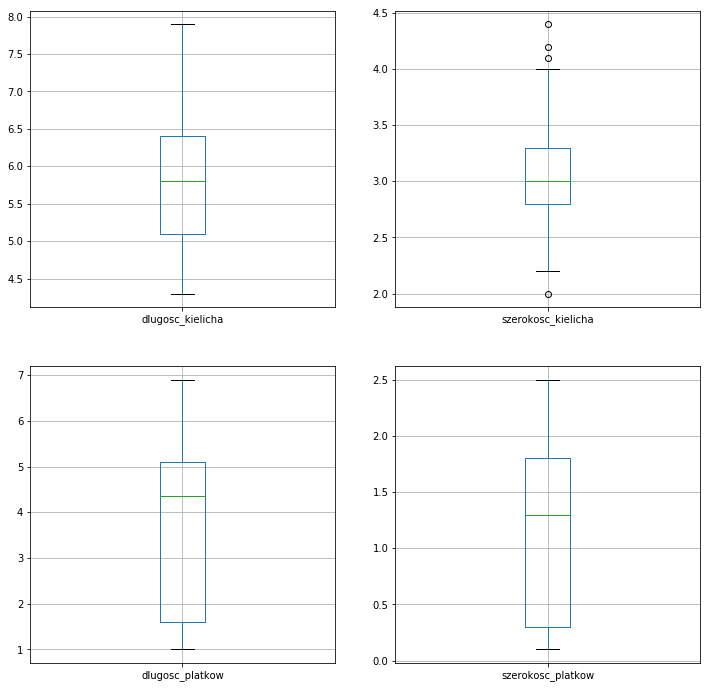

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,12))
df.boxplot(column='dlugosc_kielicha', ax=axes[0,0])
df.boxplot(column='szerokosc_kielicha', ax=axes[0,1])
df.boxplot(column='dlugosc_platkow', ax=axes[1,0])
df.boxplot(column='szerokosc_platkow', ax=axes[1,1]);

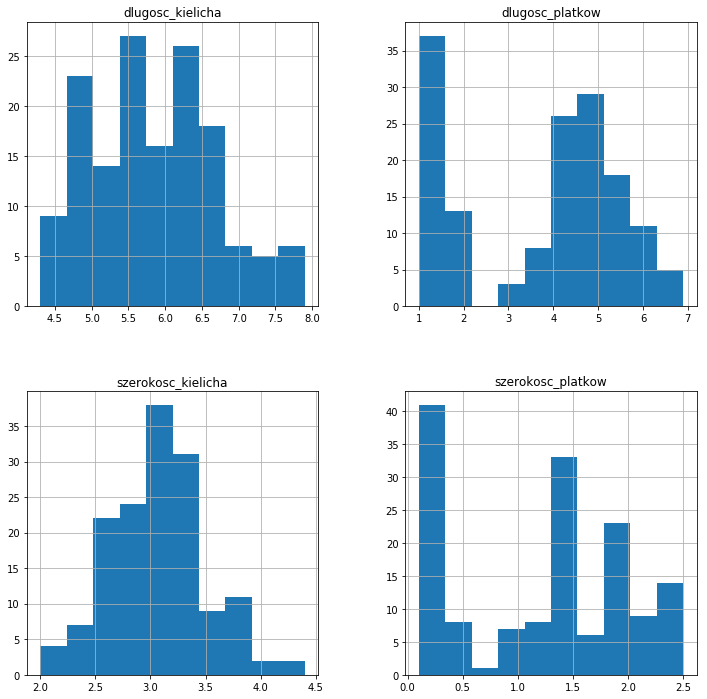

In [0]:
plt.rcParams["figure.figsize"] = [12,12]
df.hist();

Z histogramów widać, że prawdopodobnie dwie zmienne mają rozkład normalny

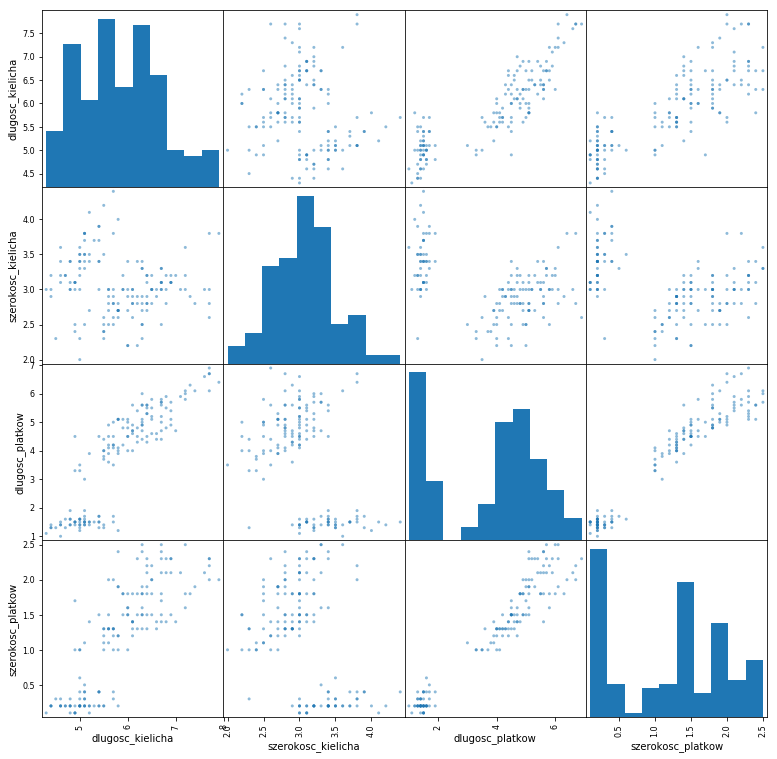

In [0]:
scatter_matrix(df, figsize=(13,13));

## 3. Zastosowanie algorytmów

In [0]:
# podział danych
X = df.drop('gatunek', axis=1)
y = df['gatunek']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Wypróbujemy kilka modeli:


*  Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).

Jest to mieszanka modeli linearnych (LR, LDA) i nie liniowych



In [0]:
seed = 42
punkty = 'accuracy'

modele = []
modele.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
modele.append(('LDA', LinearDiscriminantAnalysis()))
modele.append(('KNN', KNeighborsClassifier()))
modele.append(('CART', DecisionTreeClassifier()))
modele.append(('NB', GaussianNB()))
modele.append(('SVM', SVC(gamma='auto')))
# sprawdzanie modeli
wyniki = []
nazwy = []
for nazwa, model in modele:
	kfold = KFold(n_splits=10, random_state=seed)
	cvs = cross_val_score(model, X_train, y_train, cv=kfold, scoring=punkty)
	wyniki.append(cvs)
	nazwy.append(nazwa)
	wiadomosc = "%s: %f (%f)" % (nazwa, cvs.mean(), cvs.std())
	print(wiadomosc)

LR: 0.953636 (0.061718)
LDA: 0.972727 (0.058210)
KNN: 0.943636 (0.061496)
CART: 0.923636 (0.055922)
NB: 0.924545 (0.079985)
SVM: 0.943636 (0.061496)


Wynika z tego, że SVM i KNNma najlepszy średni wynik oraz najmniejsze odchylenie standardowe.

## 4. Prognozowanie

In [0]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
przewidywanie = knn.predict(X_test)
print(accuracy_score(y_test, przewidywanie))
print(confusion_matrix(y_test, przewidywanie))
print(classification_report(y_test, przewidywanie))

1.0
[[13  0  0]
 [ 0 19  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

 roznobarwny       1.00      1.00      1.00        13
szczecinkowy       1.00      1.00      1.00        19
 wirginijski       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [0]:
# SVM
svm = SVC(gamma='scale')
svm.fit(X_train, y_train)
przewidywanie = svm.predict(X_test)
print(accuracy_score(y_test, przewidywanie))
print(confusion_matrix(y_test, przewidywanie))
print(classification_report(y_test, przewidywanie))

1.0
[[13  0  0]
 [ 0 19  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

 roznobarwny       1.00      1.00      1.00        13
szczecinkowy       1.00      1.00      1.00        19
 wirginijski       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 5. Próba użycia Tensorflow

Należy zmienić wartości tabel z gatunkami na numeryczne

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
dlugosc_kielicha      150 non-null float64
szerokosc_kielicha    150 non-null float64
dlugosc_platkow       150 non-null float64
szerokosc_platkow     150 non-null float64
gatunek               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [0]:
adres = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
nazwy = ['dlugosc_kielicha','szerokosc_kielicha','dlugosc_platkow','szerokosc_platkow','gatunek']
df = pd.read_csv(adres, names=nazwy)
df['gatunek'] = df['gatunek'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})

In [0]:
df['gatunek'] = df['gatunek'].apply(int)

In [0]:
X = df.drop('gatunek', axis=1)
y = df['gatunek']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
import tensorflow as tf

In [0]:
X.columns

Index(['dlugosc_kielicha', 'szerokosc_kielicha', 'dlugosc_platkow',
       'szerokosc_platkow'],
      dtype='object')

In [0]:
# kolumny z cechami

kol_cech = []
for kol in X.columns:
  kol_cech.append(tf.feature_column.numeric_column(kol))

kol_cech

[NumericColumn(key='dlugosc_kielicha', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='szerokosc_kielicha', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='dlugosc_platkow', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='szerokosc_platkow', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train, batch_size=15,num_epochs=10,shuffle=True)

In [0]:
classifier = tf.estimator.DNNClassifier(hidden_units= [10,20,10],n_classes=3,feature_columns=kol_cech)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp7kupxnkh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4f6f6c10f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
classifier.train(input_fn=input_func,steps=50)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp7kupxnkh/model.ckpt.
INFO:tensorflow:loss = 24.205326, step = 0
INFO:tensorflow:Saving checkpoints for 50 into /tmp/tmp7kupxnkh/model.ckpt.
INFO:tensorflow:Loss for final step: 2.7405362.


In [0]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [0]:
przewidywania = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7kupxnkh/model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
przewidywania

[{'class_ids': array([2]),
  'classes': array([b'2'], dtype=object),
  'logits': array([-4.6516485, -1.9302549, -1.2131308], dtype=float32),
  'probabilities': array([0.02112278, 0.32109776, 0.6577795 ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logits': array([-3.4049635 , -0.93855953, -1.9655545 ], dtype=float32),
  'probabilities': array([0.05882972, 0.6930146 , 0.24815565], dtype=float32)},
 {'class_ids': array([2]),
  'classes': array([b'2'], dtype=object),
  'logits': array([-6.8278494, -4.1514344, -0.7023307], dtype=float32),
  'probabilities': array([0.00211455, 0.03073047, 0.967155  ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logits': array([ 2.77325  , -1.5970407, -3.0336802], dtype=float32),
  'probabilities': array([0.9845871 , 0.01245263, 0.0029603 ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logits': array([-3.2894385, -0.8939514, -

In [0]:
ostateczne_przew = []
for przewid in przewidywania:
  ostateczne_przew.append(przewid['class_ids'][0])

In [0]:
ostateczne_przew

[2,
 1,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 2]

In [0]:
print(confusion_matrix(y_test, ostateczne_przew))

[[14  0  0]
 [ 0 10  8]
 [ 0  0 13]]


In [0]:
print(classification_report(y_test, ostateczne_przew))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.56      0.71        18
           2       0.62      1.00      0.76        13

   micro avg       0.82      0.82      0.82        45
   macro avg       0.87      0.85      0.83        45
weighted avg       0.89      0.82      0.82        45

